This lab on Linear Regression in R comes from p. 109-119 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani 

#  3.6.1 Libraries

The ${\tt library()}$ function is used to load libraries, or groups of functions and
data sets that are not included in the base R distribution. Basic functions
that perform least squares linear regression and other simple analyses come
standard with the base distribution, but more exotic functions require additional
libraries. Here we load the ${\tt MASS}$ package, which is a very large
collection of data sets and functions. We also load the ${\tt ISLR}$ package, which
includes the data sets associated with this book.

In [1]:
list.of.packages <- c("car","ISLR","MASS")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

In [2]:
library(MASS)
library(ISLR)

# 3.6.2 Simple Linear Regression

In [3]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

This should break, R doesn't know where to look for the data

In [4]:
#lm.fit=lm(medv~lstat)

We can tell it explicitly with this function call

In [5]:
lm.fit=lm(medv~lstat,data=Boston)

Now let's fit a simple linear model with ${\tt medv}$ as the response and ${\tt lstat}$ as the predictor

In [6]:
lm.fit=lm(medv~lstat,data=Boston)

If we type $\tt{lm.fit}$, some basic information about the model is output.
For more detailed information, we use $\tt{summary(lm.fit)}$

In [7]:
lm.fit
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  



Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


We can use the ${\tt names()}$ function in order to find out what other pieces of information are stored in ${\tt lm.fit}$. Although we can extract these quantities by name—e.g. ${\tt lm.fit$coefficients}$—it is safer to use the extractor functions like ${\tt coef()}$ to access them.

In [8]:
names(lm.fit)
coef(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

(Intercept)       lstat 
 34.5538409  -0.9500494

In order to obtain a confidence interval for the coefficient estimates, we can use the ${\tt confint()}$ command.

In [9]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The ${\tt predict()}$ function can be used to produce both confidence intervals and prediction intervals for the prediction of ${\tt medv}$ for a given value of ${\tt lstat}$.

In [10]:
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="confidence")
predict(lm.fit,data.frame(lstat=(c(5,10,15))), interval="prediction")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


We will now plot ${\tt medv}$ and ${\tt lstat}$ along with the least squares regression line using the ${\tt plot()}$ and ${\tt abline()}$ functions.

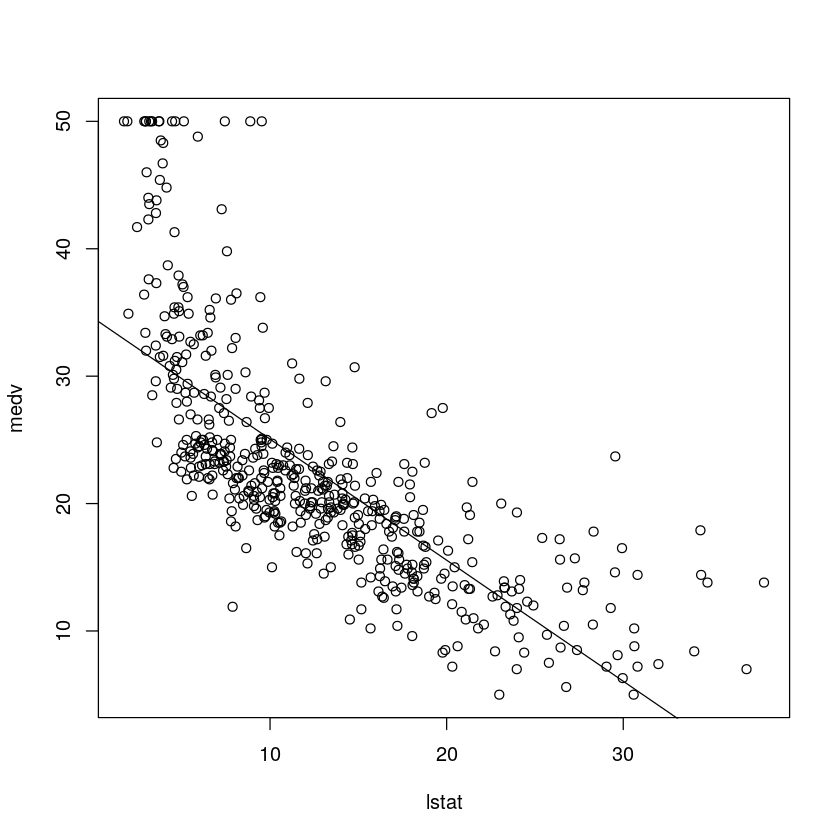

In [11]:
attach(Boston)
plot(lstat,medv)
abline(lm.fit)

The ${\tt abline()}$ function can be used to draw any line, not just the least squares regression line. To draw a line with intercept ${\tt a}$ and slope ${\tt b}$, we type ${\tt abline(a,b)}$. Below we experiment with some additional settings for plotting lines and points. The ${\tt lwd=3}$ command causes the width of the regression line to be increased by a factor of 3; this works for the ${\tt plot()}$ and ${\tt lines()}$ functions also. We can also use the ${\tt pch}$ option to create different plotting symbols.

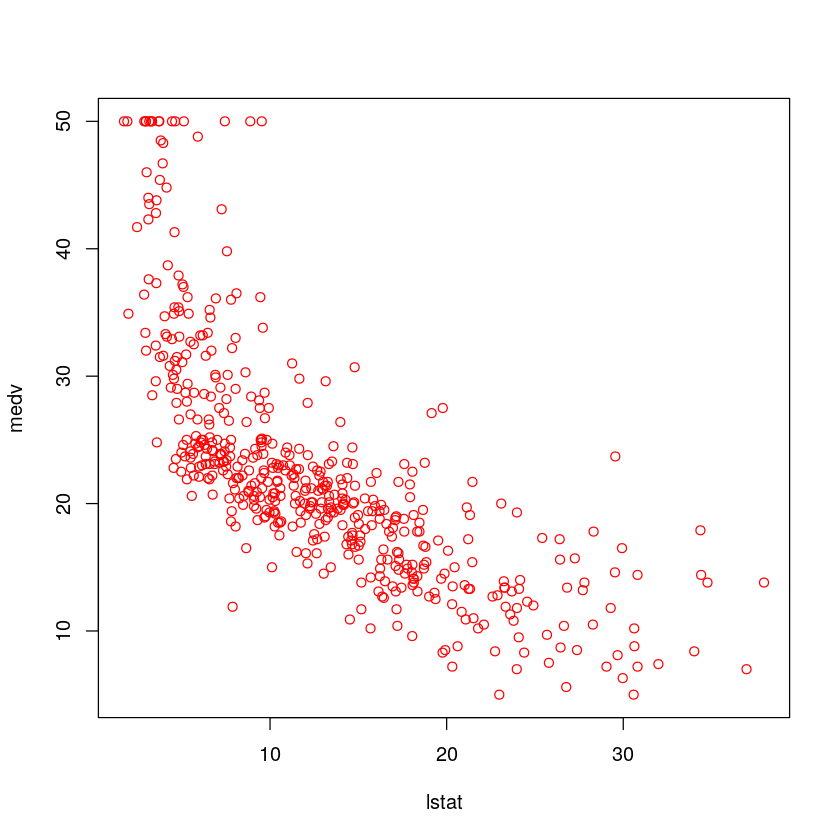

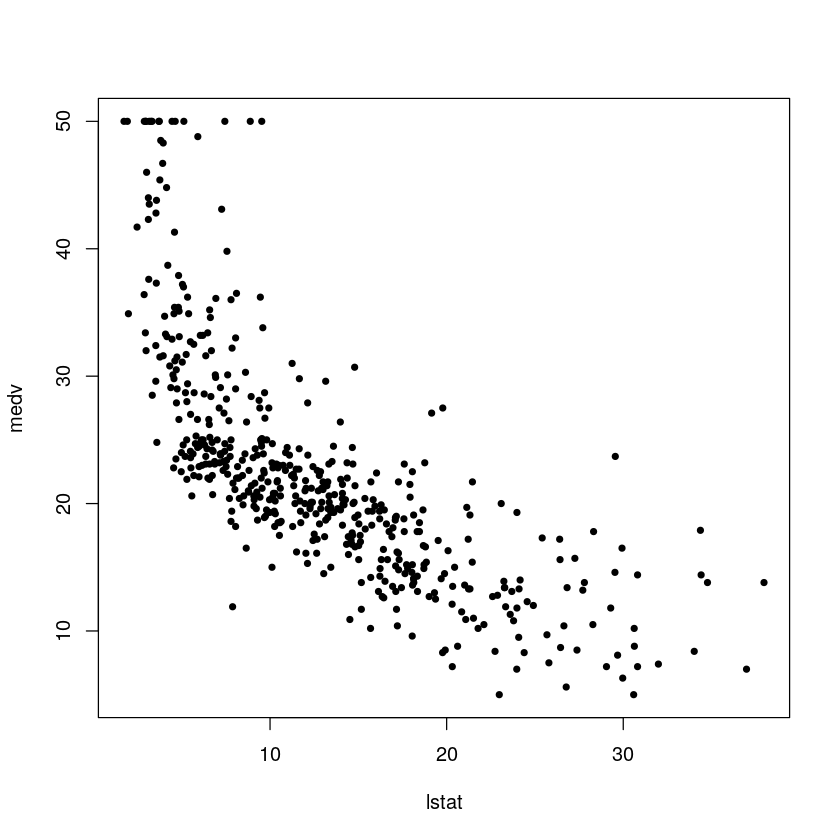

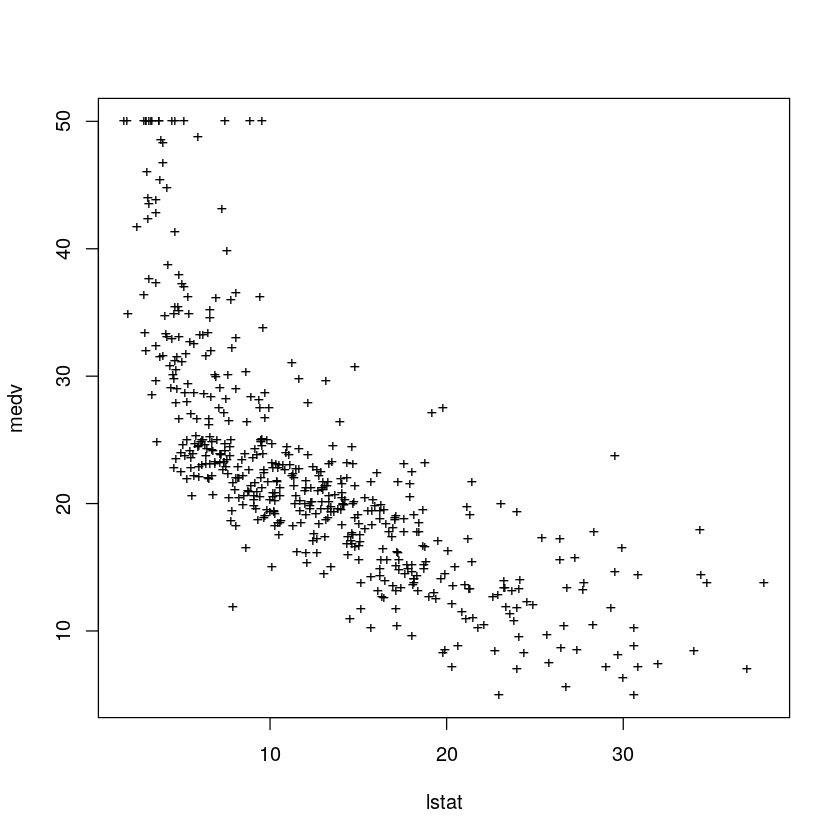

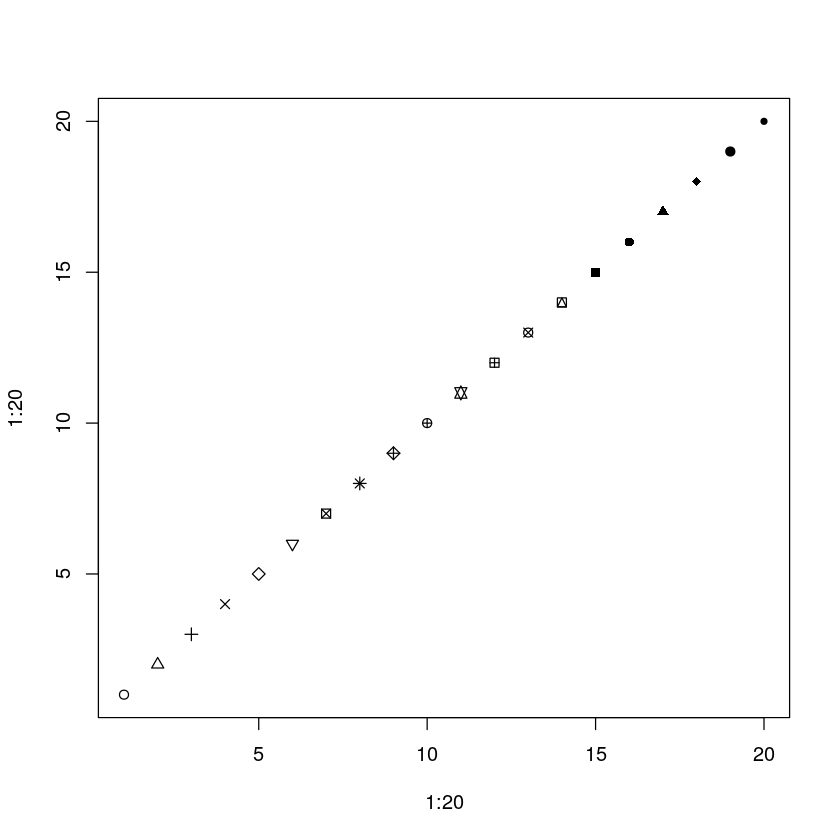

In [12]:
plot(lstat,medv,col="red")
plot(lstat,medv,pch=20)
plot(lstat,medv,pch="+")
plot(1:20,1:20,pch=1:20)

Four diagnostic plots are automatically produced by applying the ${\tt plot()}$ function directly to the output from ${\tt lm()}$. In general, this command will produce one plot at a time, and hitting Enter will generate the next plot. However, it is often convenient to view all four plots together.

We can achieve this by using the ${\tt par()}$ function, which tells R to split the display screen into separate panels so that multiple plots can be viewed simultaneously.

For example, ${\tt par(mfrow=c(2,2))}$ divides the plotting region into a 2 × 2 grid of panels.

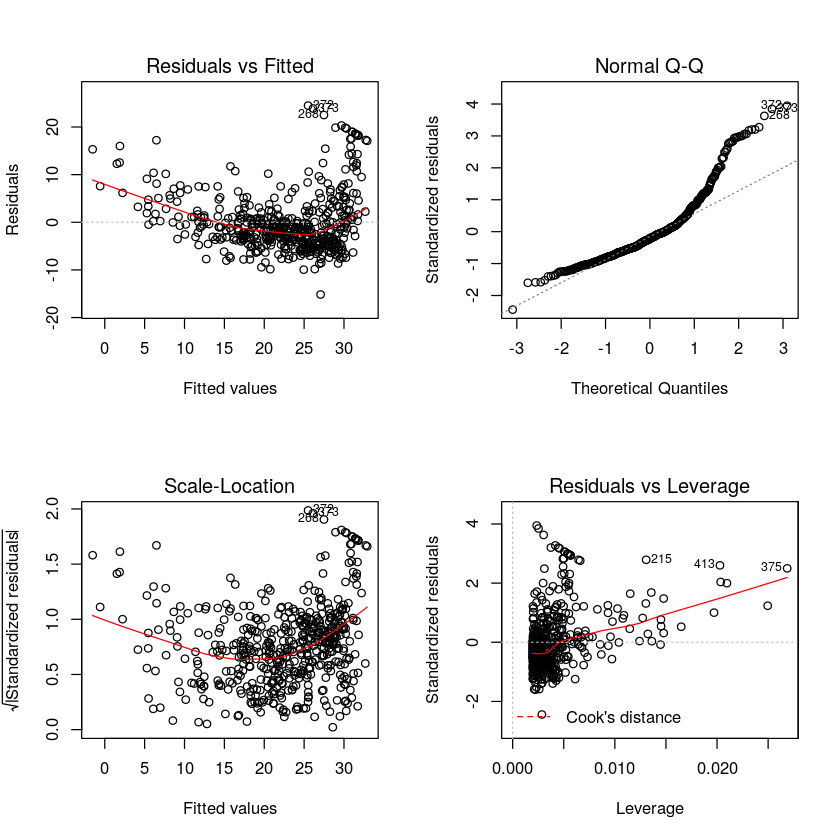

In [13]:
par(mfrow=c(2,2))
plot(lm.fit)

Alternatively, we can compute the residuals from a linear regression fit using the ${\tt residuals()}$ function. The function ${\tt rstudent()}$ will return the studentized residuals, and we can use this function to plot the residuals against the fitted values.

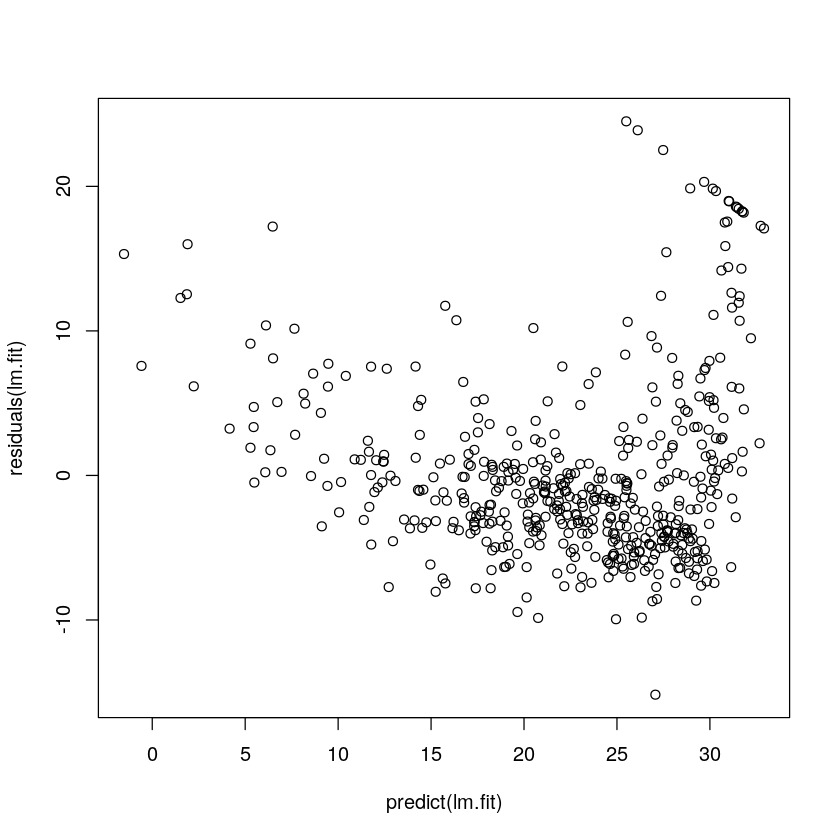

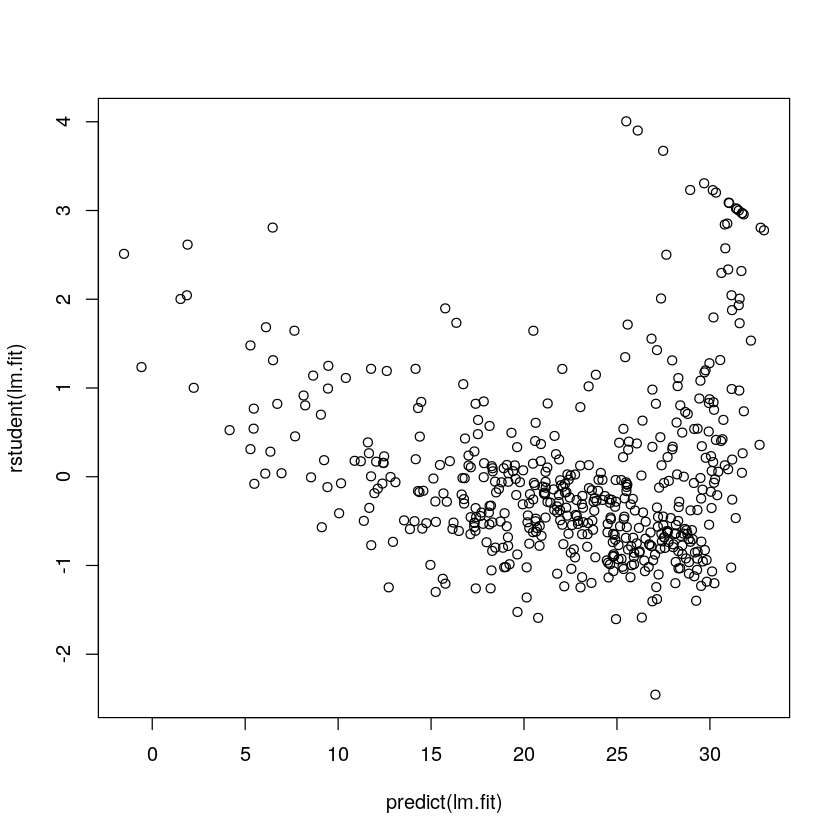

In [14]:
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

On the basis of the residual plots, there is some evidence of non-linearity. Leverage statistics can be computed for any number of predictors using the ${\tt hatvalues()}$ function.

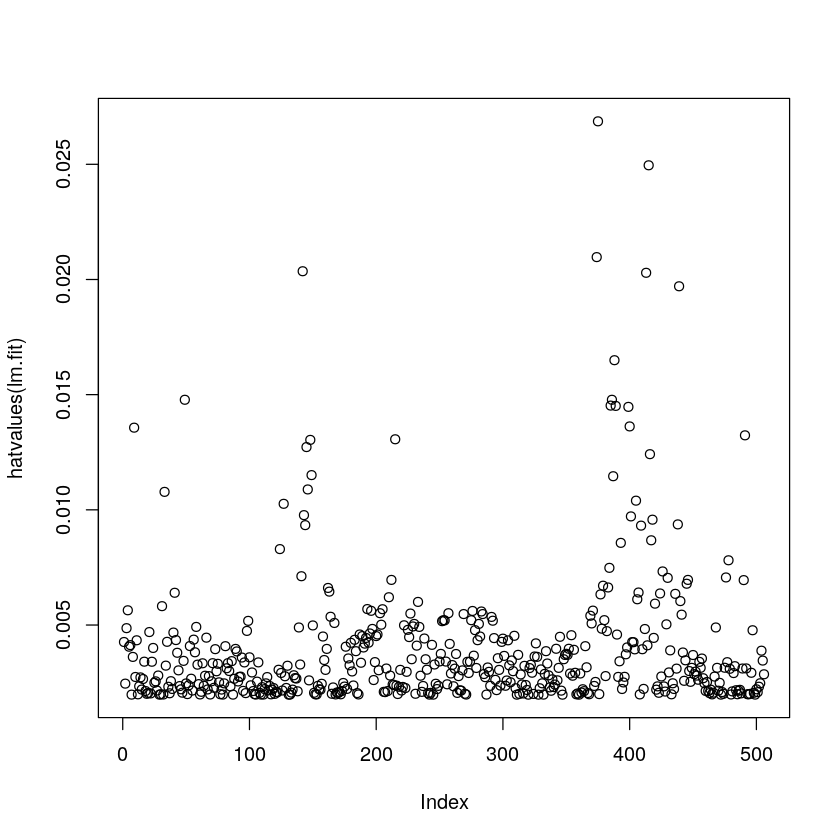

In [15]:
plot(hatvalues(lm.fit))

The ${\tt which.max()}$ function identifies the index of the largest element of a vector. In this case, it tells us which observation has the largest leverage statistic.

In [16]:
which.max(hatvalues(lm.fit))

375 
375

#  3.6.3 Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the lm() function. The syntax lm(y∼x1+x2+x3) is used to fit a model with three predictors, x1, x2, and x3. The summary() function now outputs the regression coefficients for all the predictors.

In [17]:
lm.fit=lm(medv~lstat+age,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


The Boston data set contains 13 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors. Instead, we can use the following short-hand:

In [18]:
lm.fit=lm(medv~.,data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

The ${\tt vif()}$ function, part of the car package, can be used to compute variance inflation factors. Most VIFs are low to moderate for this data. The car package is not part of the base R installation so it must be downloaded the first time you use it via the ${\tt install.packages}$ option in R.

In [19]:
library(car)
vif(lm.fit)

Loading required package: carData


crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

What if we would like to perform a regression using all of the variables but one? For example, in the above regression output, age has a high p-value. So we may wish to run a regression excluding this predictor. The following syntax results in a regression using all predictors except age.

In [20]:
lm.fit1=lm(medv~.-age,data=Boston)
summary(lm.fit1)


Call:
lm(formula = medv ~ . - age, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.6054  -2.7313  -0.5188   1.7601  26.2243 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.436927   5.080119   7.172 2.72e-12 ***
crim         -0.108006   0.032832  -3.290 0.001075 ** 
zn            0.046334   0.013613   3.404 0.000719 ***
indus         0.020562   0.061433   0.335 0.737989    
chas          2.689026   0.859598   3.128 0.001863 ** 
nox         -17.713540   3.679308  -4.814 1.97e-06 ***
rm            3.814394   0.408480   9.338  < 2e-16 ***
dis          -1.478612   0.190611  -7.757 5.03e-14 ***
rad           0.305786   0.066089   4.627 4.75e-06 ***
tax          -0.012329   0.003755  -3.283 0.001099 ** 
ptratio      -0.952211   0.130294  -7.308 1.10e-12 ***
black         0.009321   0.002678   3.481 0.000544 ***
lstat        -0.523852   0.047625 -10.999  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1

Alternatively, the ${\tt update()}$ function can be used.

In [21]:
lm.fit1=update(lm.fit, ~.-age)

# 3.6.4 Interaction Terms

It is easy to include interaction terms in a linear model using the ${\tt lm()}$ function. The syntax ${\tt lstat:black}$ tells R to include an interaction term between ${\tt lstat}$ and ${\tt black}$. The syntax ${\tt lstat*age}$ simultaneously includes ${\tt lstat}$, ${\tt age}$, and the interaction term ${\tt lstat×age}$ as predictors; it is a shorthand for ${\tt lstat+age+lstat:age}$.

In [22]:
summary(lm(medv~lstat*age,data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


# 3.6.5 Non-linear Transformations of the Predictors

The ${\tt lm()}$ function can also accommodate non-linear transformations of the predictors. For instance, given a predictor ${\tt X}$, we can create a predictor ${\tt X2}$ using ${\tt I(X^{\wedge} 2)}$. The function ${\tt I()}$ is needed since the ^ has a special meaning in a formula; wrapping as we do allows the standard usage in R, which is to raise ${\tt X }$to the power 2. We now perform a regression of ${\tt medv}$ onto ${\tt lstat}$ and ${\tt lstat2}$.

In [23]:
lm.fit2=lm(medv~lstat+I(lstat^2),data=Boston)
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


The near-zero p-value associated with the quadratic term suggests that it leads to an improved model. We use the ${\tt anova()}$ function to further quantify the extent to which the quadratic fit is superior to the linear fit.

In [24]:
lm.fit=lm(medv~lstat,data=Boston)
anova(lm.fit,lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


Here Model 1 represents the linear submodel containing only one predictor, ${\tt lstat}$, while Model 2 corresponds to the larger quadraticmodel that has two predictors, ${\tt lstat}$ and ${\tt lstat2}$. The ${\tt anova()}$ function performs a hypothesis test comparing the two models. The null hypothesis is that the two models fit the data equally well, and the alternative hypothesis is that the full model is superior. 

the F-statistic is 135 and the associated p-value is virtually zero. This provides very clear evidence that the model containing the predictors ${\tt lstat}$ and ${\tt lstat2}$ is far superior to the model that only contains the predictor ${\tt lstat}$. This is not surprising, since earlier we saw evidence for non-linearity in the relationship between ${\tt medv}$ and ${\tt lstat}$. 

If we type:

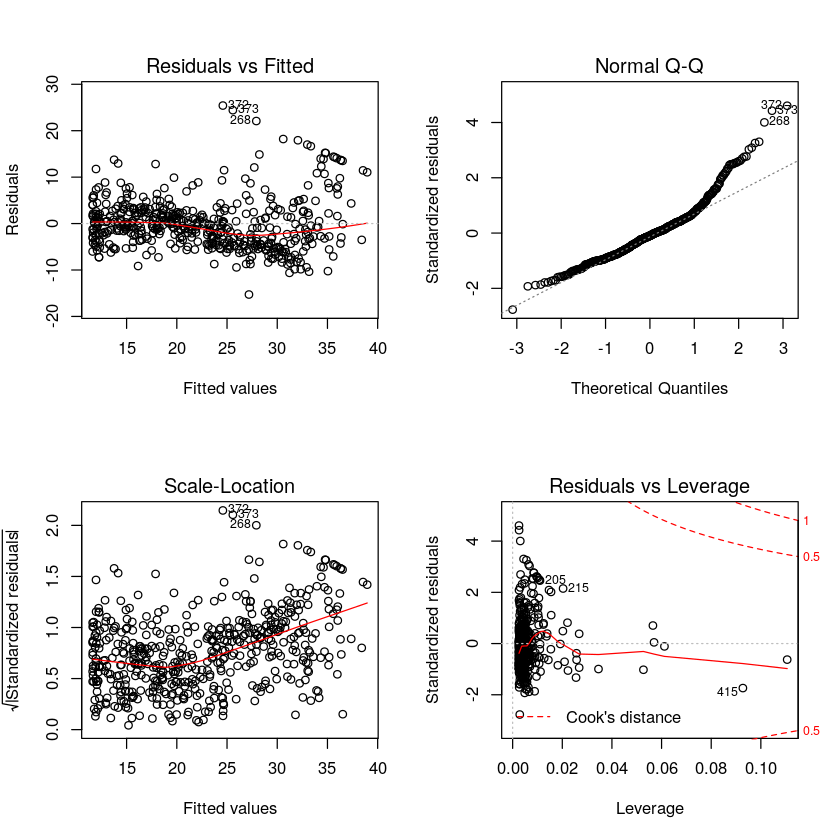

In [25]:
par(mfrow=c(2,2))
plot(lm.fit2)

then we see that when the ${\tt lstat2}$ term is included in the model, there is little discernible pattern in the residuals.

In order to create a cubic fit, we can include a predictor of the form ${\tt I(X^{\wedge}3)}$. However, this approach can start to get cumbersome for higher order polynomials. A better approach involves using the ${\tt poly()}$ function to create the polynomial within ${\tt lm()}$. For example, the following command produces a fifth-order polynomial fit:

In [26]:
lm.fit5=lm(medv~poly(lstat,5,raw=TRUE),data=Boston)
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5, raw = TRUE), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  6.770e+01  3.604e+00  18.783  < 2e-16 ***
poly(lstat, 5, raw = TRUE)1 -1.199e+01  1.526e+00  -7.859 2.39e-14 ***
poly(lstat, 5, raw = TRUE)2  1.273e+00  2.232e-01   5.703 2.01e-08 ***
poly(lstat, 5, raw = TRUE)3 -6.827e-02  1.438e-02  -4.747 2.70e-06 ***
poly(lstat, 5, raw = TRUE)4  1.726e-03  4.167e-04   4.143 4.03e-05 ***
poly(lstat, 5, raw = TRUE)5 -1.632e-05  4.420e-06  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


This suggests that including additional polynomial terms, up to fifth order, leads to an improvement in the model fit! However, further investigation of the data reveals that no polynomial terms beyond fifth order have significant p-values in a regression fit.

Of course, we are in no way restricted to using polynomial transformations of the predictors. Here we try a log transformation.

In [27]:
summary(lm(medv~log(rm),data=Boston))


Call:
lm(formula = medv ~ log(rm), data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.487  -2.875  -0.104   2.837  39.816 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -76.488      5.028  -15.21   <2e-16 ***
log(rm)       54.055      2.739   19.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.915 on 504 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4347 
F-statistic: 389.3 on 1 and 504 DF,  p-value: < 2.2e-16


# 3.6.6 Qualitative Predictors

We will now examine the ${\tt Carseats}$ data, which is part of the ${\tt ISLR}$ library. We will attempt to predict ${\tt Sales}$ (child car seat sales) in 400 locations based on a number of predictors.

In [28]:
fix(Carseats)
names(Carseats)

[1] "Sales"       "CompPrice"   "Income"      "Advertising" "Population" 
 [6] "Price"       "ShelveLoc"   "Age"         "Education"   "Urban"      
[11] "US"

The ${\tt Carseats}$ data includes qualitative predictors such as ${\tt Shelveloc}$, an indicator of the quality of the shelving location—that is, the space within a store in which the car seat is displayed—at each location. The predictor ${\tt Shelveloc}$ takes on three possible values, ${\tt Bad}$, ${\tt Medium}$, and ${\tt Good}$.

Given a qualitative variable such as ${\tt Shelveloc}$, R generates dummy variables automatically. Below we fit a multiple regression model that includes some interaction terms.

In [29]:
lm.fit=lm(Sales~.+Income:Advertising+Price:Age,data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ . + Income:Advertising + Price:Age, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9208 -0.7503  0.0177  0.6754  3.3413 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         6.5755654  1.0087470   6.519 2.22e-10 ***
CompPrice           0.0929371  0.0041183  22.567  < 2e-16 ***
Income              0.0108940  0.0026044   4.183 3.57e-05 ***
Advertising         0.0702462  0.0226091   3.107 0.002030 ** 
Population          0.0001592  0.0003679   0.433 0.665330    
Price              -0.1008064  0.0074399 -13.549  < 2e-16 ***
ShelveLocGood       4.8486762  0.1528378  31.724  < 2e-16 ***
ShelveLocMedium     1.9532620  0.1257682  15.531  < 2e-16 ***
Age                -0.0579466  0.0159506  -3.633 0.000318 ***
Education          -0.0208525  0.0196131  -1.063 0.288361    
UrbanYes            0.1401597  0.1124019   1.247 0.213171    
USYes              -0.1575571  0.1489234  -1.058 0.290729    
Inco

The ${\tt contrasts()}$ function returns the coding that R uses for the dummy variables. Use ${\tt ?contrasts}$ to learn about other contrasts, and how to set them.

In [30]:
contrasts(Carseats$ShelveLoc)

,Good,Medium
Bad,0,0
Good,1,0
Medium,0,1


# Getting Credit
To get credit for this lab, please reply to the prompt posted to the [#lab2](https://sds293.slack.com/messages/C76KRHW14) Slack channel.

# Additional Examples


Call:
lm(formula = chol ~ age)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40729 -0.24133 -0.04522  0.17939  0.63040 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.089218   0.221466   4.918 0.000154 ***
age         0.057788   0.005399  10.704 1.06e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3027 on 16 degrees of freedom
Multiple R-squared:  0.8775,	Adjusted R-squared:  0.8698 
F-statistic: 114.6 on 1 and 16 DF,  p-value: 1.058e-08


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
age,1,10.494371,10.49437072,114.5651,1.058073e-08
Residuals,16,1.465629,0.09160183,NA,NA



Call:
lm(formula = chol ~ age)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40729 -0.24133 -0.04522  0.17939  0.63040 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.089218   0.221466   4.918 0.000154 ***
age         0.057788   0.005399  10.704 1.06e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3027 on 16 degrees of freedom
Multiple R-squared:  0.8775,	Adjusted R-squared:  0.8698 
F-statistic: 114.6 on 1 and 16 DF,  p-value: 1.058e-08


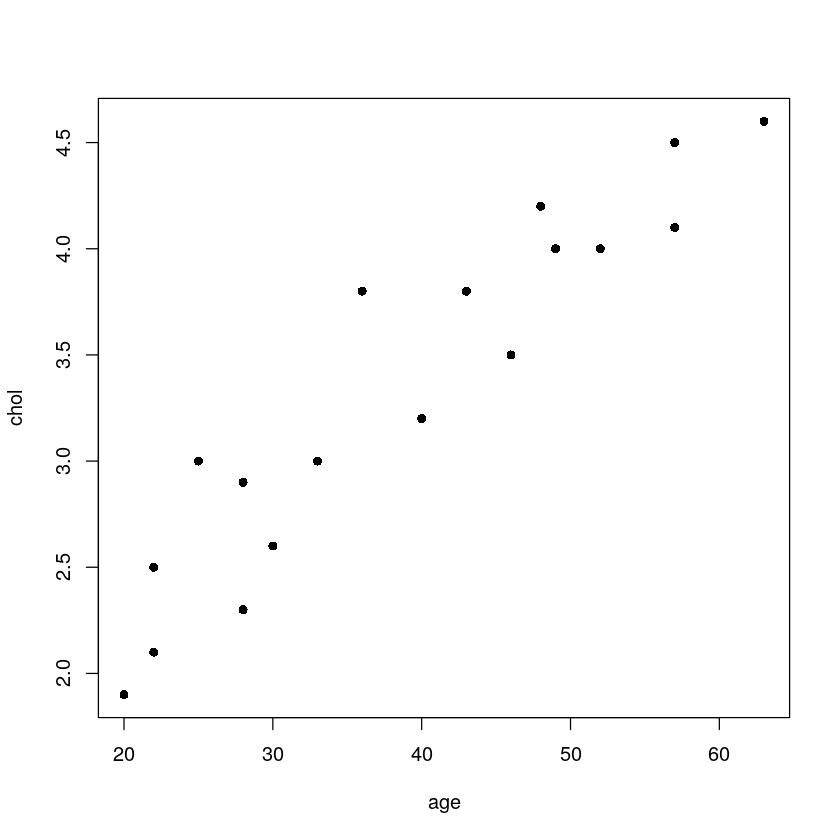

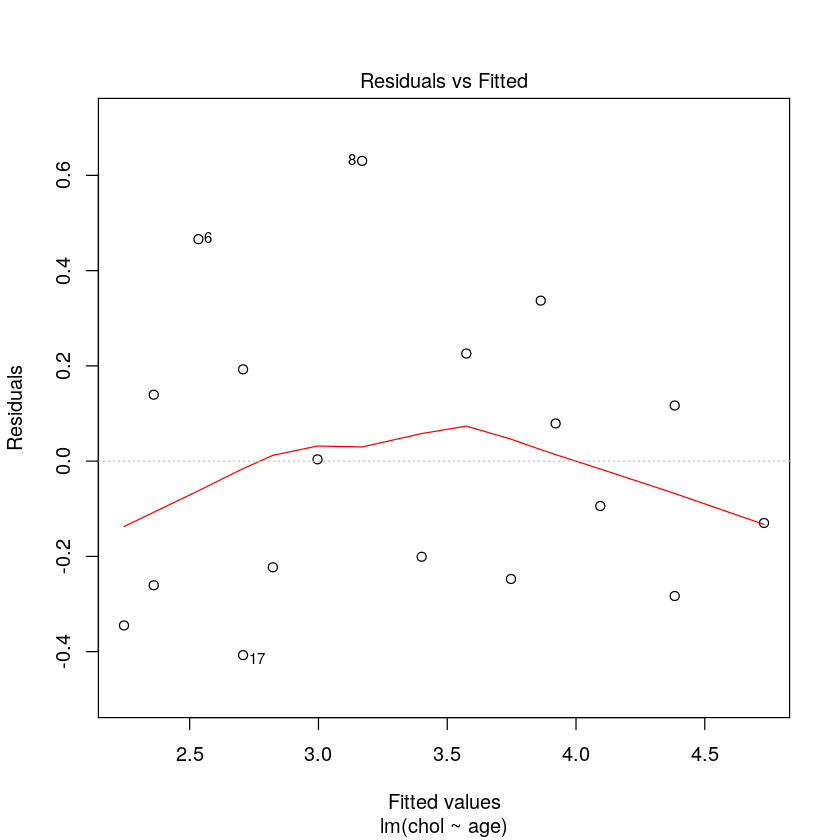

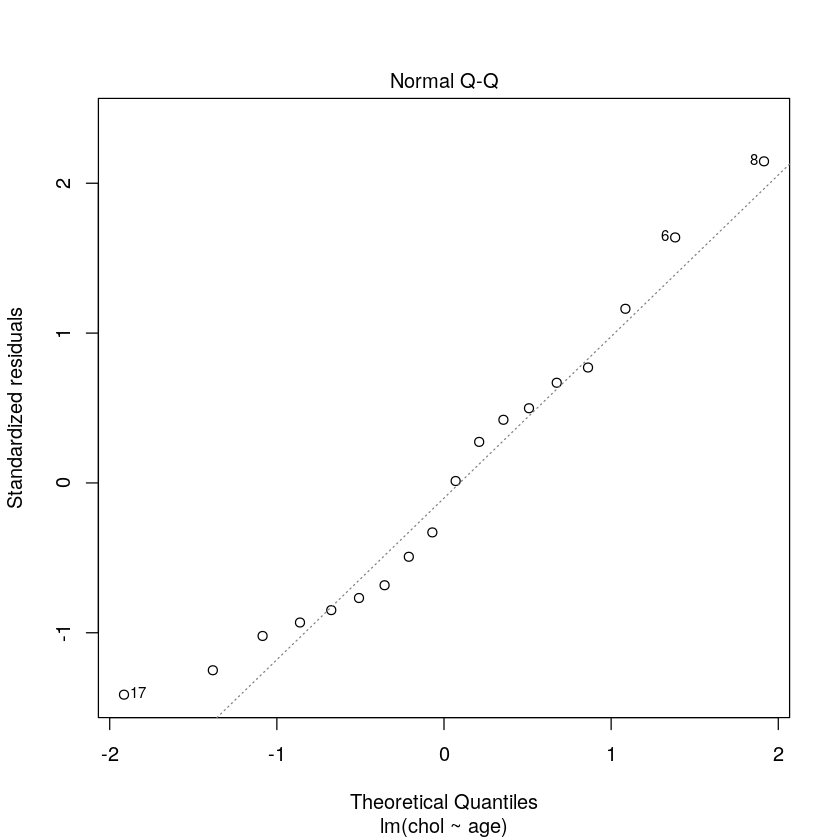

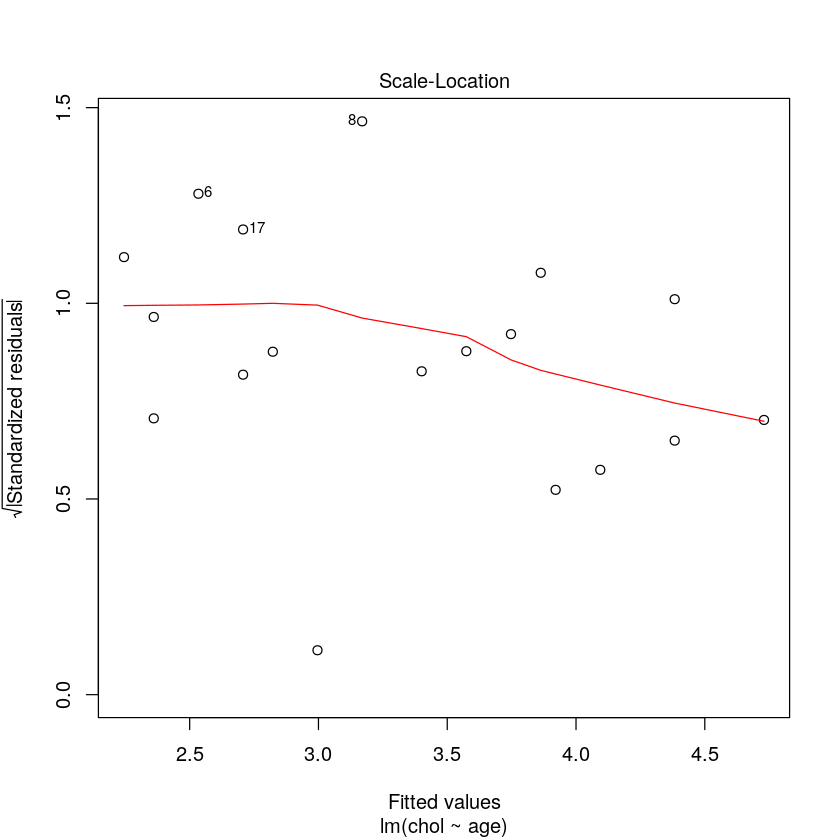


Call:
lm(formula = sa ~ bmi)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.54204 -0.97584  0.05082  1.16160  2.70856 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.92512    0.64489   7.637 1.81e-09 ***
bmi         -0.05967    0.02862  -2.084   0.0432 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.354 on 42 degrees of freedom
Multiple R-squared:  0.09376,	Adjusted R-squared:  0.07218 
F-statistic: 4.345 on 1 and 42 DF,  p-value: 0.04323


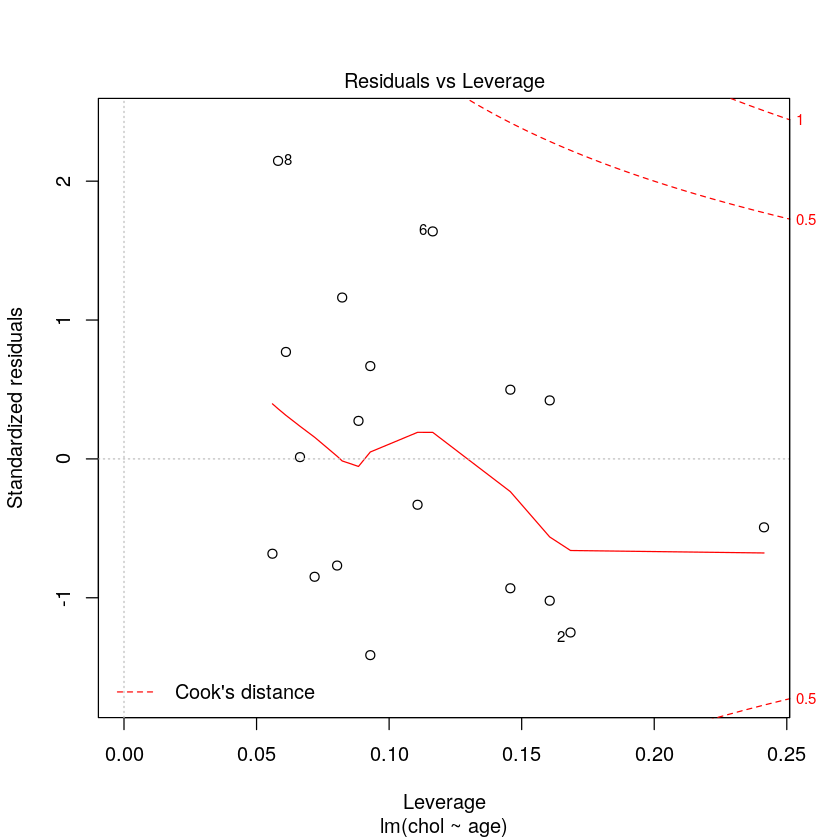

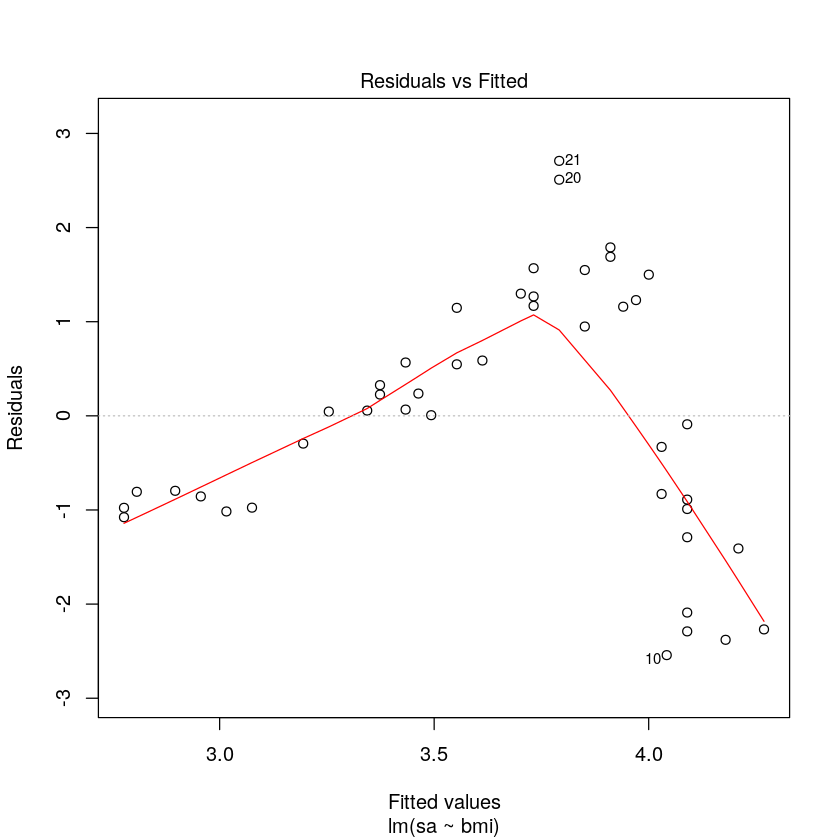

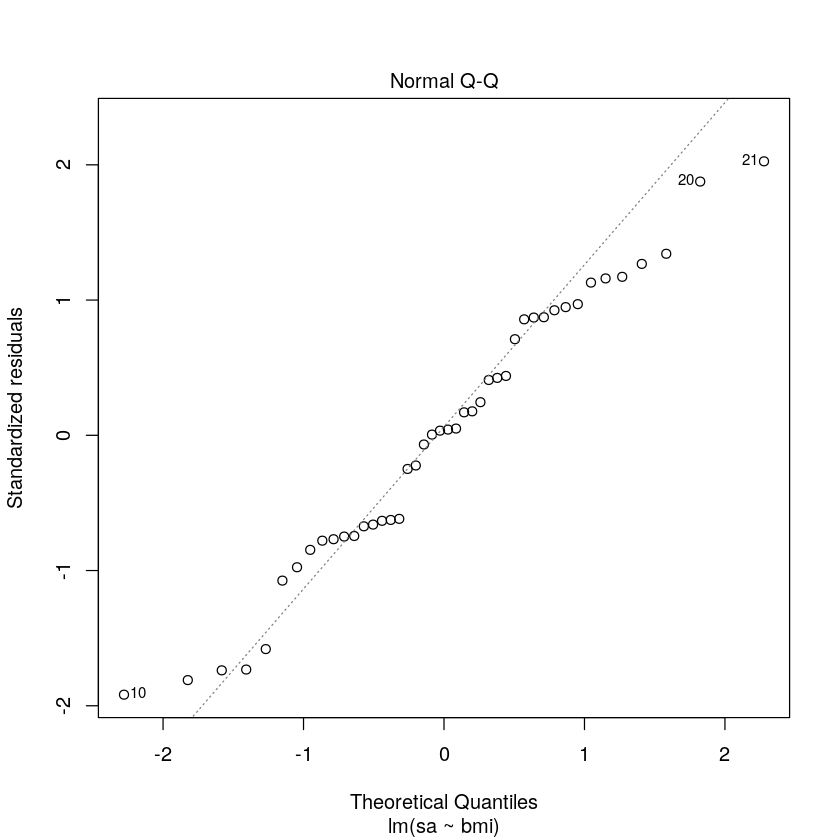

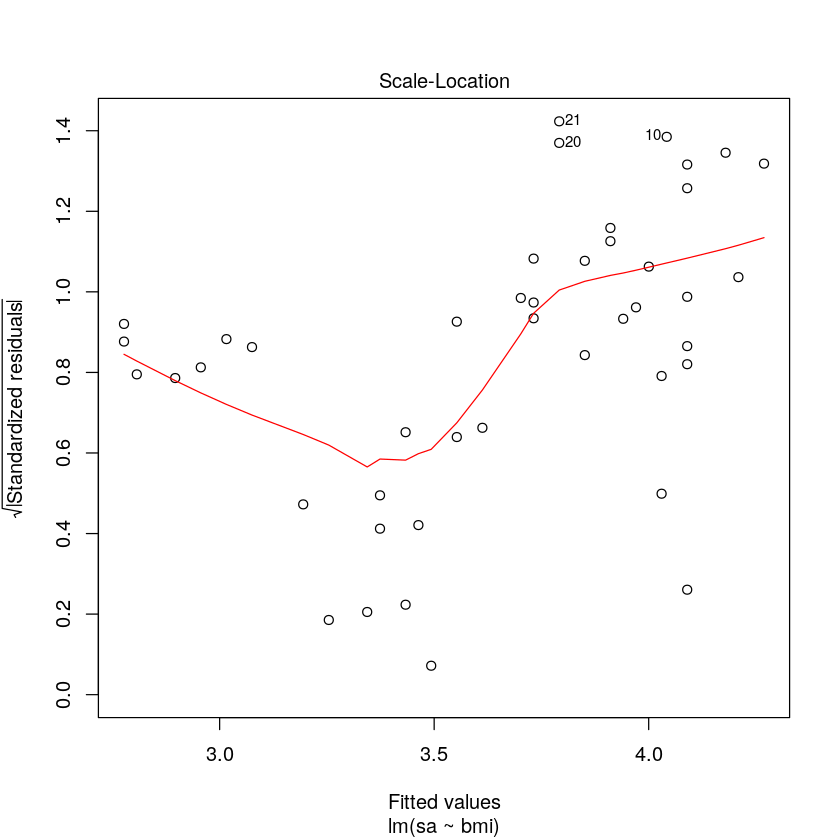

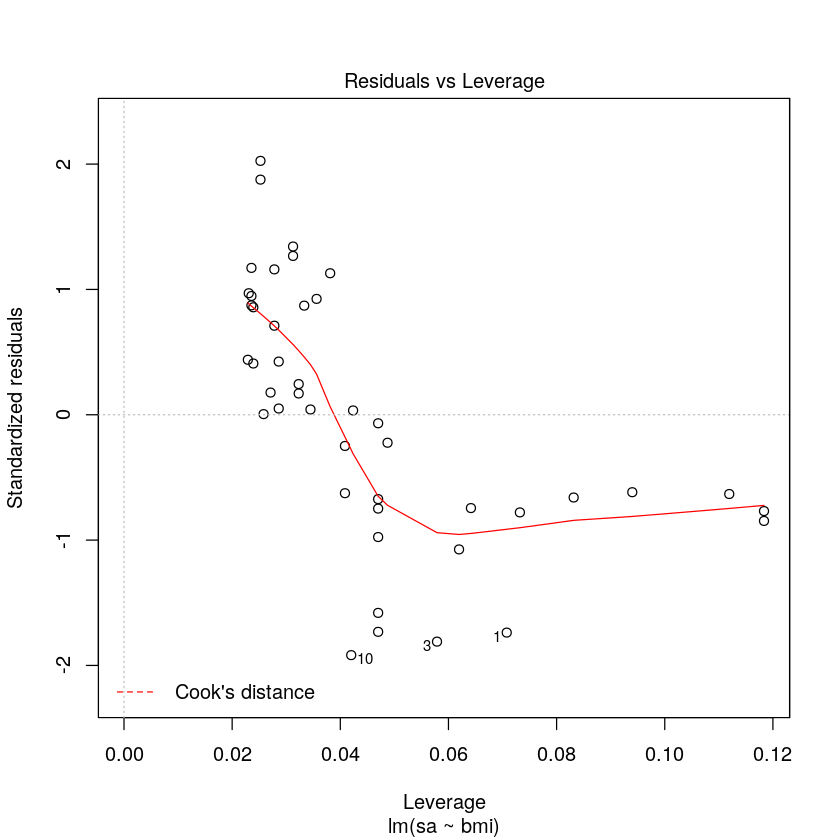

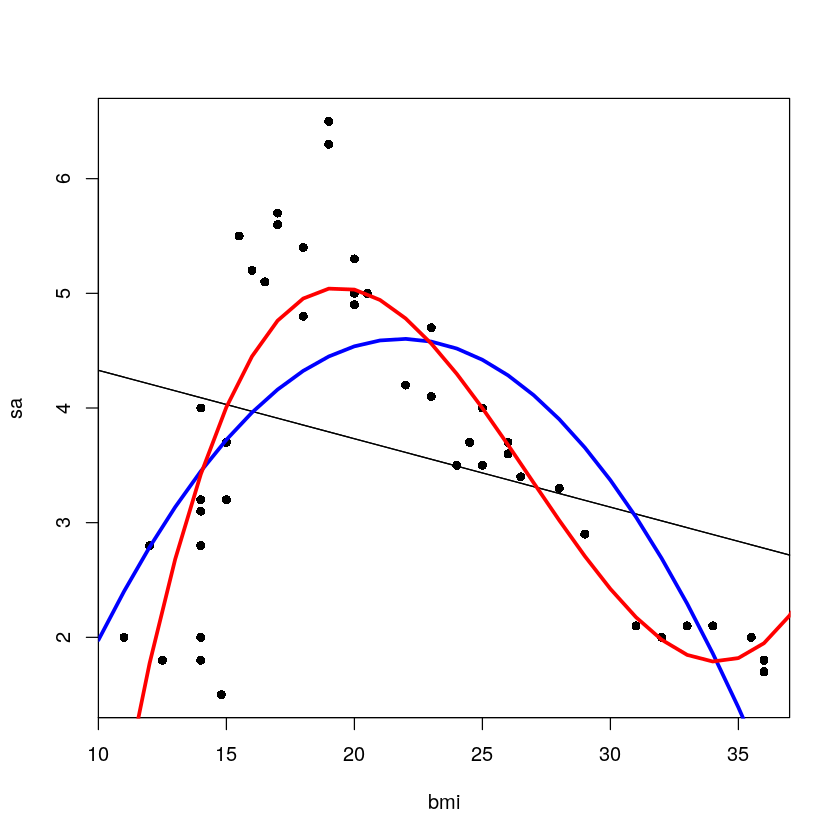

In [31]:

# Simple example

id <- seq(1:18)
age <- c(46, 20, 52, 30, 57, 25, 28, 36, 22, 
         43, 57, 33, 22, 63, 40, 48, 28, 49)
chol <- c(3.5, 1.9, 4.0, 2.6, 4.5, 3.0, 2.9, 3.8, 2.1,
          3.8, 4.1, 3.0, 2.5, 4.6, 3.2, 4.2, 2.3, 4.0)
plot(chol ~ age, pch=16)

#Fit linear regression model

reg <- lm(chol ~ age)
summary(reg)
anova(reg)
summary(reg)
par(mfrow=c(1,1))
plot(reg)



Call:
lm(formula = sa ~ bmi)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.54204 -0.97584  0.05082  1.16160  2.70856 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.92512    0.64489   7.637 1.81e-09 ***
bmi         -0.05967    0.02862  -2.084   0.0432 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.354 on 42 degrees of freedom
Multiple R-squared:  0.09376,	Adjusted R-squared:  0.07218 
F-statistic: 4.345 on 1 and 42 DF,  p-value: 0.04323


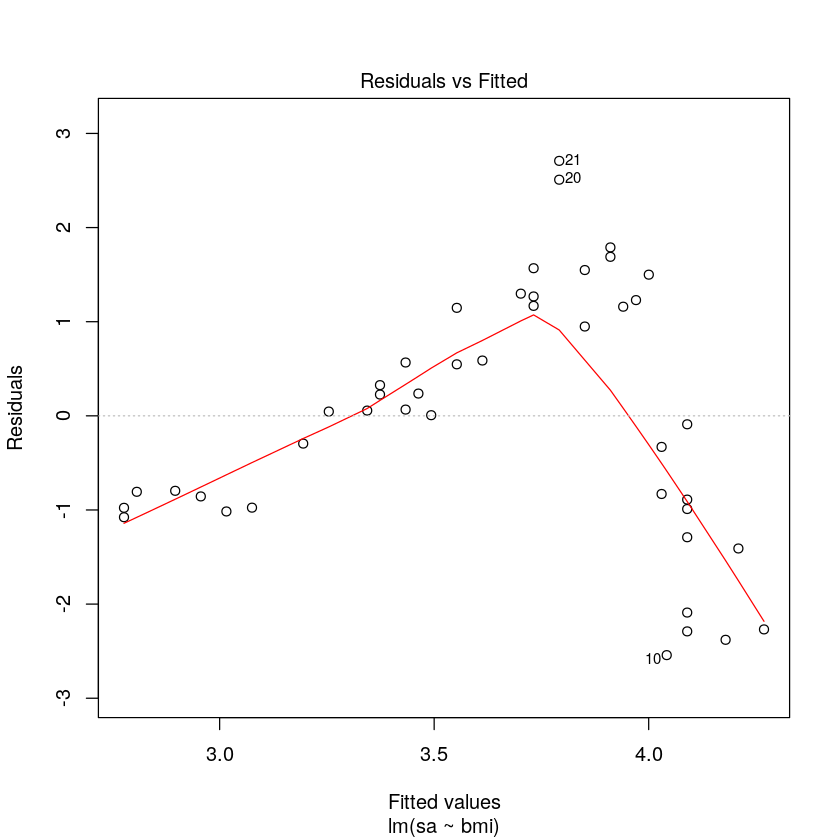

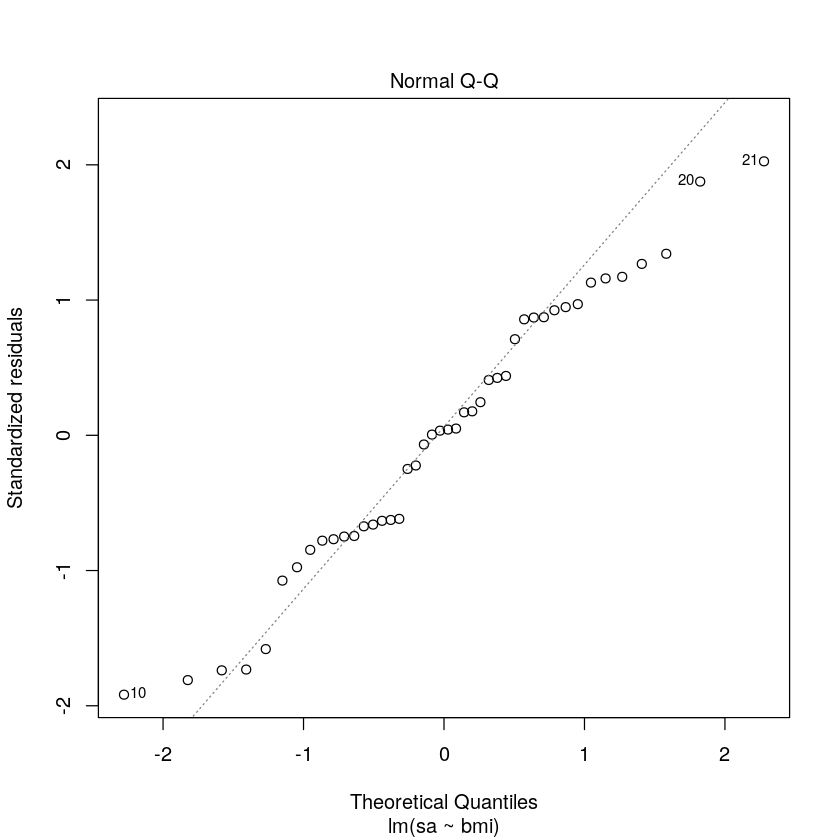

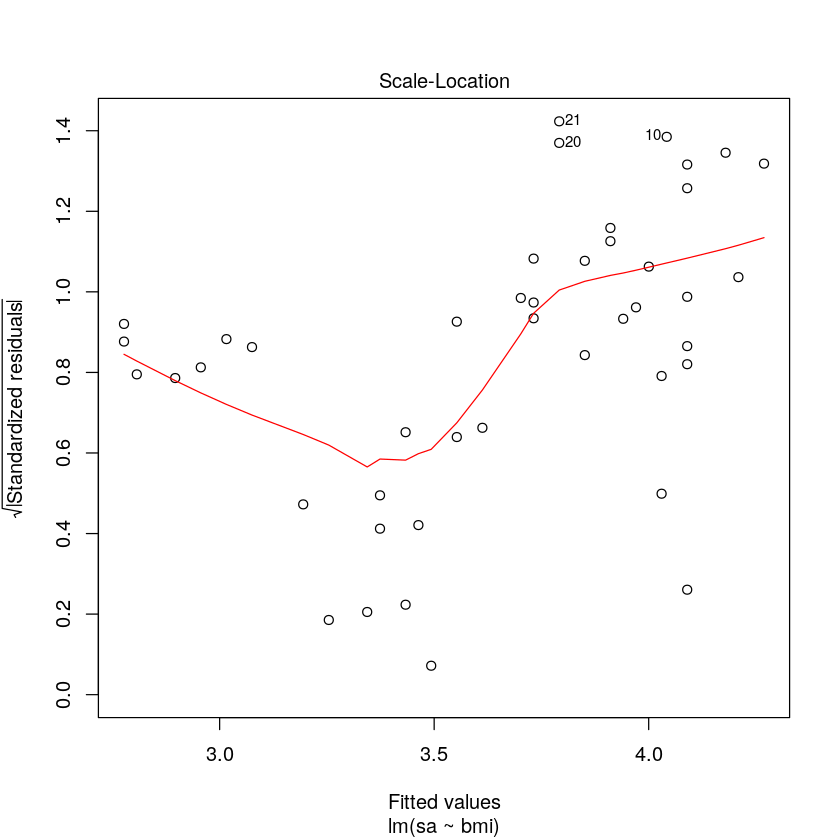

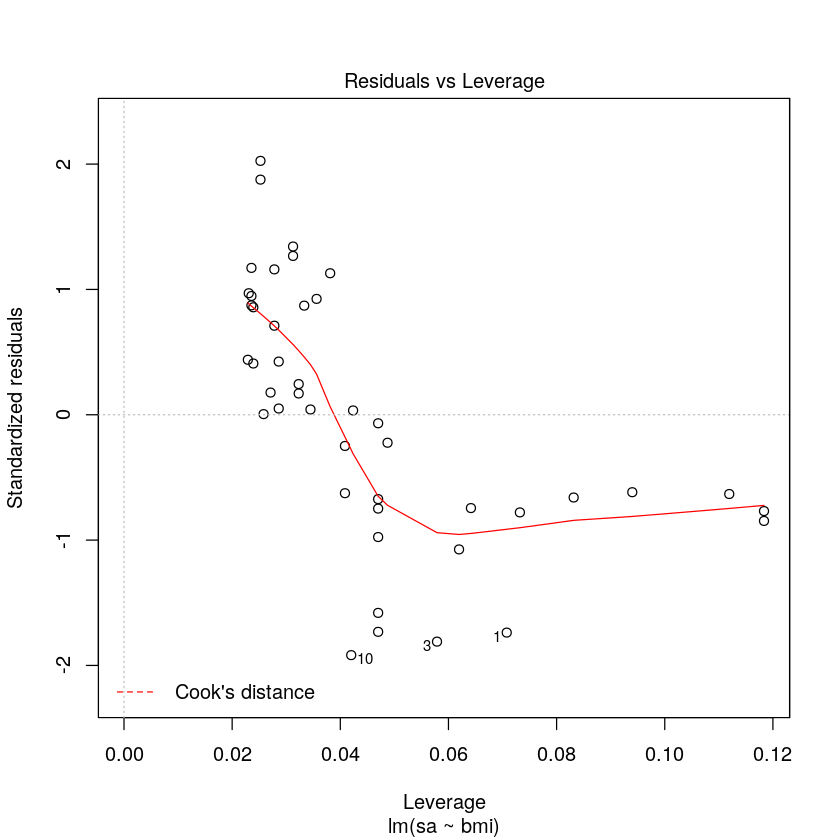

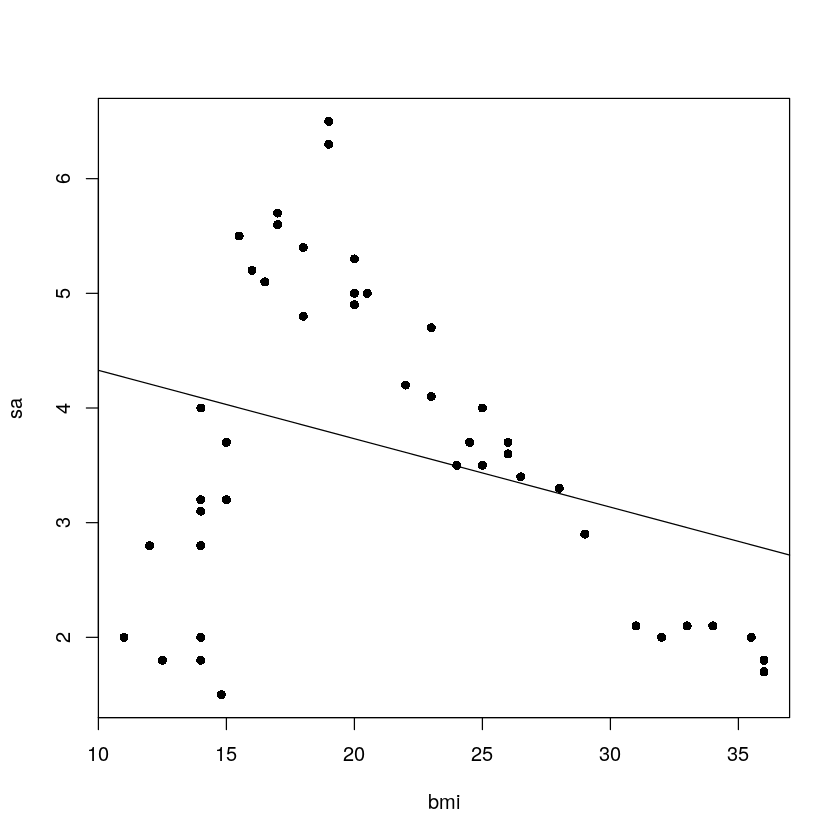

In [33]:

############################################
#Study on 44 university students
#Measure body mass index (BMI)
#Sexual attractiveness (SA) score

id <- seq(1:44)
bmi <- c(11.00, 12.00, 12.50, 14.00, 14.00, 14.00, 14.00,
         14.00, 14.00, 14.80, 15.00, 15.00, 15.50, 16.00,
         16.50, 17.00, 17.00, 18.00, 18.00, 19.00, 19.00,
         20.00, 20.00, 20.00, 20.50, 22.00, 23.00, 23.00,
         24.00, 24.50, 25.00, 25.00, 26.00, 26.00, 26.50,
         28.00, 29.00, 31.00, 32.00, 33.00, 34.00, 35.50,
         36.00, 36.00) 
sa <- c(2.0, 2.8, 1.8, 1.8, 2.0, 2.8, 3.2, 3.1, 4.0, 1.5, 
        3.2, 3.7, 5.5, 5.2, 5.1, 5.7, 5.6, 4.8, 5.4, 6.3, 
        6.5, 4.9, 5.0, 5.3, 5.0, 4.2, 4.1, 4.7, 3.5, 3.7, 
        3.5, 4.0, 3.7, 3.6, 3.4, 3.3, 2.9, 2.1, 2.0, 2.1, 
        2.1, 2.0, 1.8, 1.7)

reg <- lm (sa ~ bmi)
summary(reg)
plot(reg)
par(mfrow=c(1,1))
reg <- lm(sa ~ bmi)
plot(sa ~ bmi, pch=16)
abline(reg)
linear <- lm(sa ~ bmi)
quad <- lm(sa ~ poly(bmi, 2))
cubic <- lm(sa ~ poly(bmi, 3))


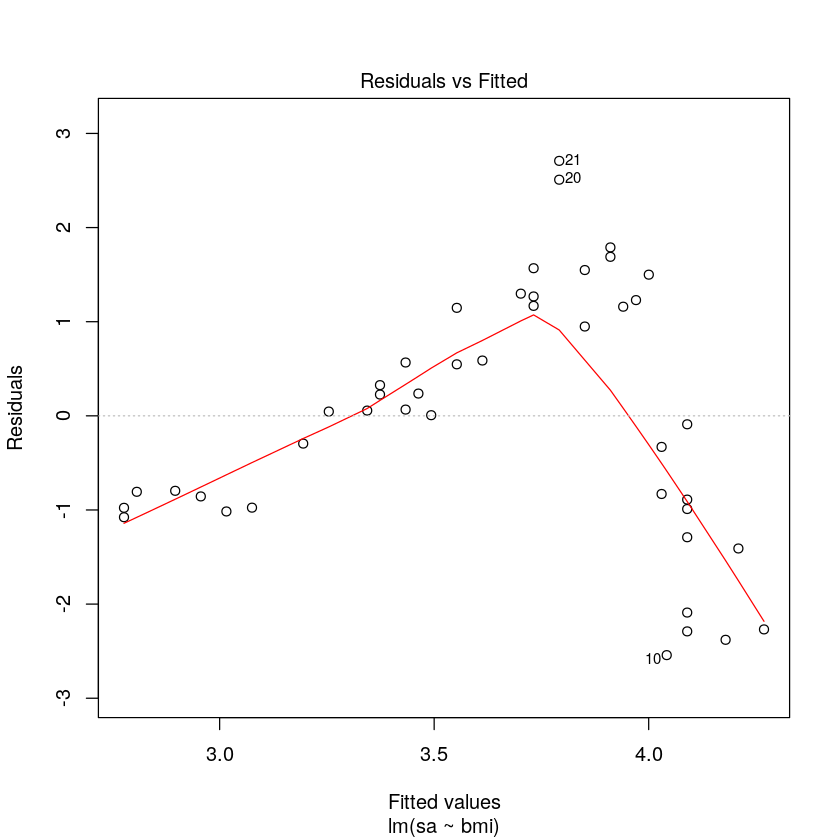

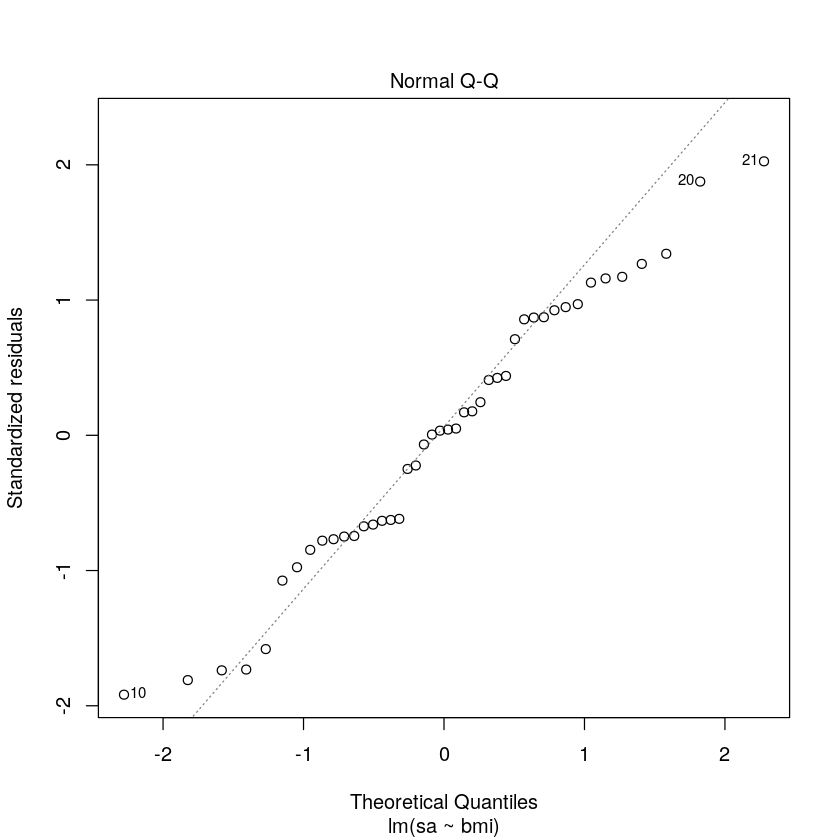

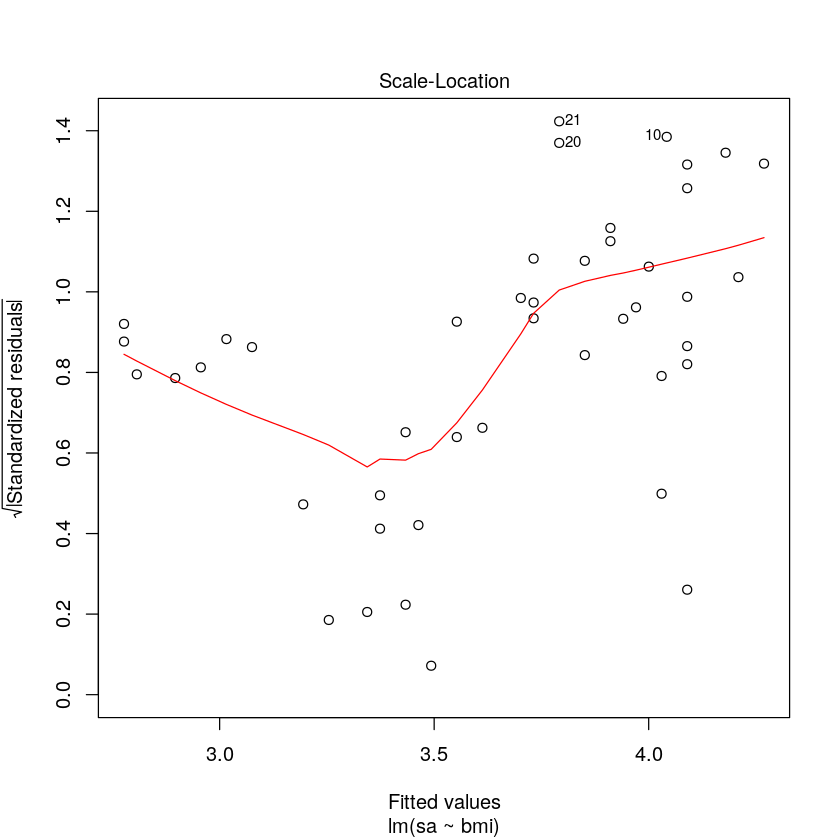

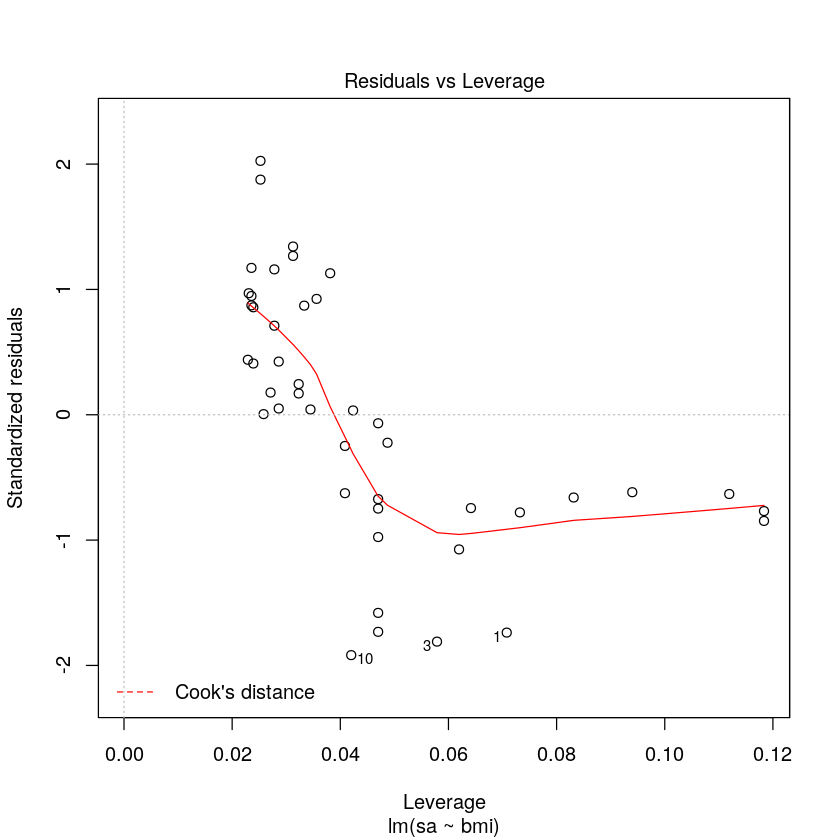

In [35]:
# Make new BMI axis
bmi.new <- 10:40

# Get predicted values
quad.pred <- predict(quad,data.frame(bmi=bmi.new))
cubic.pred <- predict(cubic,data.frame(bmi=bmi.new))

# Plot predicted values

plot(reg)
abline(reg)
lines(bmi.new, quad.pred, col="blue",lwd=3)
lines(bmi.new, cubic.pred, col="red",lwd=3)